In [ ]:
# 복습!
# 1. set_theme의 style 파라미터에서 whitegrid와 white의 차이는?
# 2. relplot에서 lineplot을 그리려면 어떤 파라미터를 주어야 하는가?

In [ ]:
# 파일 다운로드

import requests

def 다운로드(파일명, 링크):
    with open(파일명, "wb") as f:
        res = requests.get(링크)
        f.write(res.content)

파일명 = "팁.xlsx"
다운로드_링크 = "https://github.com/tyjeon24/keri-pythontraining/raw/main/Week%203/3-1/%ED%8C%81.xlsx"
다운로드(파일명, 다운로드_링크)

In [ ]:
# 폰트 설정

%matplotlib inline  

import os

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import warnings
warnings.filterwarnings(action='ignore')

path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf' # 나눔 고딕

if not os.path.exists(path):
    !apt-get update -qq
    !apt-get install fonts-nanum* -qq

font_name = fm.FontProperties(fname=path, size=10).get_name() # 기본 폰트 사이즈 : 10
plt.rc('font', family=font_name)
fm._rebuild()
print(font_name)

# 한글 폰트가 적용이 안 되는 경우 런타임 - 런타임 다시 시작을 눌러 재시작할 것.

Selecting previously unselected package fonts-nanum.
(Reading database ... 155639 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...
NanumGothic


In [ ]:
# 1. 패키지 불러오기
import pandas as pd
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
# 2. 데이터 불러오기
팁_데이터 = pd.read_excel("팁.xlsx")
팁_데이터

,가격,팁,흡연여부,요일,시간대
0,16.99,1.01,No,Sun,Dinner
1,10.34,1.66,No,Sun,Dinner
2,21.01,3.50,No,Sun,Dinner
3,23.68,3.31,No,Sun,Dinner
4,24.59,3.61,No,Sun,Dinner
...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner
240,27.18,2.00,Yes,Sat,Dinner
241,22.67,2.00,Yes,Sat,Dinner
242,17.82,1.75,No,Sat,Dinner


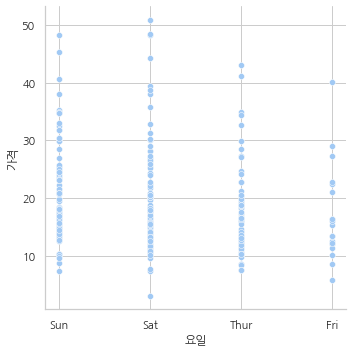

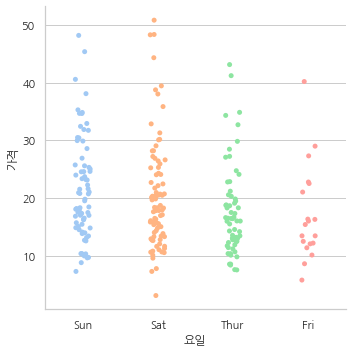

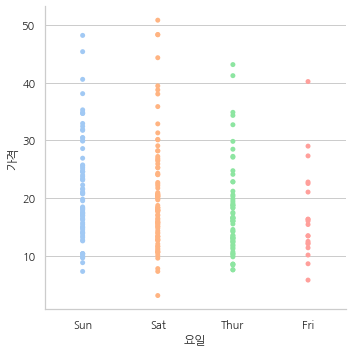

In [ ]:
# 3. catplot

# 3.1. stripplot
# stripplot은 한 축이 범주형 데이터categorical data인 scatterplot을 의미합니다.
# catplot의 기본값이 stripplot의 형태입니다.

X축 = "요일"
Y축 = "가격"
데이터 = 팁_데이터

sns.relplot(x=X축, y=Y축, data=데이터) # 일반 scatterplot은 데이터를 한 줄로 세워줍니다.

sns.catplot(x=X축, y=Y축, data=데이터)
sns.catplot(x=X축, y=Y축, data=데이터, jitter=False) # jitter=False로 파라미터를 설정하면 일반 scatterplot의 형태가 됩니다.

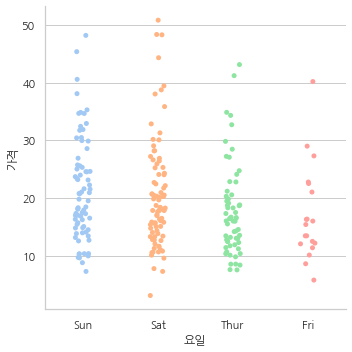

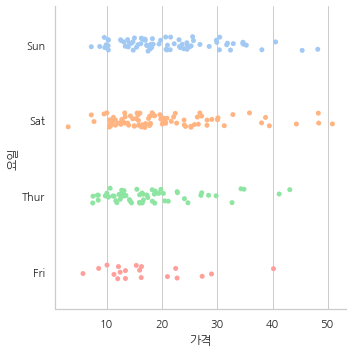

In [ ]:
X축 = "요일"
Y축 = "가격"
데이터 = 팁_데이터

sns.catplot(x=X축, y=Y축, data=데이터)

X축 = "가격" # X, Y축을 반대로 입력합니다.
Y축 = "요일"
데이터 = 팁_데이터
sns.catplot(x=X축, y=Y축, data=데이터) # 카테고리 데이터가 Y축이 제공되면 축이 회전한 효과를 낼 수 있습니다.

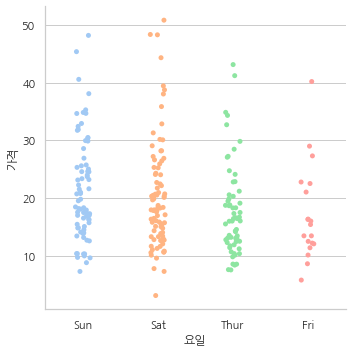

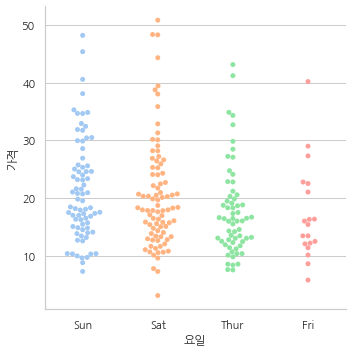

In [ ]:
# 3.2. swarmplot
# stripplot과 비슷하지만 그래프의 점들이 겹쳐지지 않습니다.

sns.catplot(x=X축, y=Y축, data=데이터)
sns.catplot(x=X축, y=Y축, data=데이터, kind="swarm")

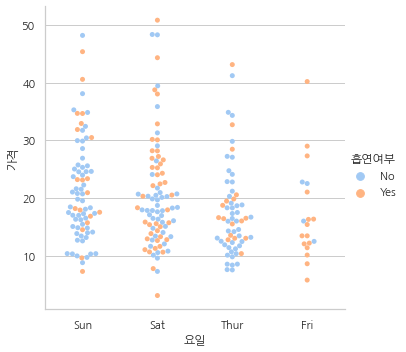

In [ ]:
# 다른 그래프와 마찬가지로 hue 파라미터를 사용할 수 있습니다.

색구분기준 = "흡연여부"
sns.catplot(x=X축, y=Y축, data=데이터, kind="swarm", hue=색구분기준)

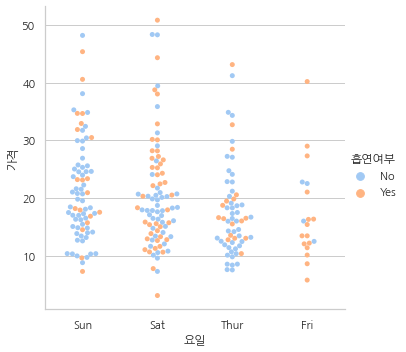

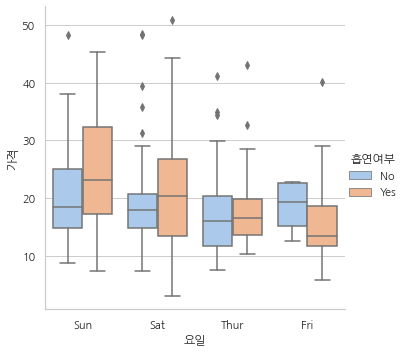

In [ ]:
# 3.3. boxplot
# boxplot은 위에서 언급한 stripplot, swarmplot과 달리 분포를 나타내는 차트입니다.
# 맨 윗 수염은 outlier를 제외한 최댓값, 맨 아랫 수염은 outlier를 제외한 최솟값입니다.
# 가운데 상자에서 윗부분은 데이터의 25% 지점(1분위수, Q1), 중간 부분은 50% 지점(2분위수, Q2, 평균이 아니라 중앙값), 아랫부분은 75% 지점(3분위수, Q3)입니다.

sns.catplot(x=X축, y=Y축, data=데이터, kind="swarm", hue=색구분기준)
sns.catplot(x=X축, y=Y축, data=데이터, kind="box", hue=색구분기준)

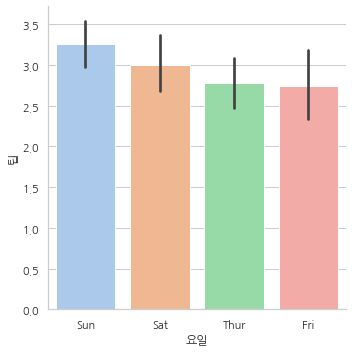

In [ ]:
# 3.4. 막대 그래프
# 한 축은 범주형 데이터가 들어가며, 다른 한 축은 데이터의 평균값이 들어갑니다. 데이터 개수가 아닙니다!
# 파라미터 kind="bar"을 제공하여 출력할 수 있습니다.

X축 = "요일"
Y축 = "팁"
데이터 = 팁_데이터

sns.catplot(x=X축, y=Y축, data=데이터, kind="bar")

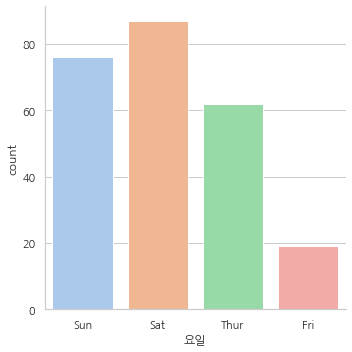

In [ ]:
# 3.5. 히스토그램(도수분포표)
# 특정 데이터의 개수를 막대 그래프로 나타낸 그래프를 히스토그램이라고 합니다.
# 파라미터 kind="bar"을 제공하여 출력할 수 있습니다.
# 참고 : 히스토그램은 y축 데이터가 필요하지 않습니다.

X축 = "요일"

sns.catplot(x=X축, data=데이터, kind="count")

In [ ]:
import folium

In [ ]:
창원광장 = [35.226367, 128.682232]
m = folium.Map(location=창원광장, zoom_start=17)
m.add_child(folium.ClickForMarker())

내용 = "창원광장입니다."
툴팁 = "창원광장"
folium.Marker(location=창원광장, popup=내용, tooltip=툴팁).add_to(m)

m

In [ ]:
창원시청 = [35.228356, 128.682073]

내용 = "창원시청입니다"
툴팁 = "창원시청"
구름_아이콘 = folium.Icon(icon="cloud")
folium.Marker(location=창원시청, popup=내용, tooltip=툴팁, icon=구름_아이콘).add_to(m)

원_반지름 = 100
내용 = "창원시청의 범위는 이정도"
파란색 = "#3186cc"
folium.CircleMarker(location=창원시청, radius=원_반지름, popup=내용, color=파란색, fill=True, fill_color=파란색).add_to(m)

m